In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
%matplotlib inline

import seaborn as sns
import scipy as sp
import sys
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('DSI_kickstarterscrape_dataset.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45957 entries, 0 to 45956
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ks_                45957 non-null  int64  
 1   name               45957 non-null  object 
 2   url                45957 non-null  object 
 3   category           45957 non-null  object 
 4   subcategory        45957 non-null  object 
 5   location           44635 non-null  object 
 6   status             45957 non-null  object 
 7   goal               45957 non-null  float64
 8   pledged            45945 non-null  float64
 9   funded percentage  45957 non-null  float64
 10  backers            45957 non-null  int64  
 11  funded date        45957 non-null  object 
 12  levels             45957 non-null  int64  
 13  reward levels      45898 non-null  object 
 14  updates            45957 non-null  int64  
 15  comments           45957 non-null  int64  
 16  duration           459

In [4]:
df.isnull().sum()

ks_                     0
name                    0
url                     0
category                0
subcategory             0
location             1322
status                  0
goal                    0
pledged                12
funded percentage       0
backers                 0
funded date             0
levels                  0
reward levels          59
updates                 0
comments                0
duration                0
dtype: int64

In [5]:
df.describe()

,ks_,goal,pledged,funded percentage,backers,levels,updates,comments,duration
count,4.595700e+04,4.595700e+04,4.594500e+04,45957.000000,45957.000000,45957.000000,45957.00000,45957.000000,45957.000000
mean,1.080800e+09,1.194271e+04,4.980750e+03,1.850129,69.973192,8.004939,4.08508,8.379529,39.995547
std,6.218057e+08,1.887583e+05,5.674162e+04,88.492706,688.628479,4.233907,6.43922,174.015737,17.414458
min,3.940900e+04,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,0.00000,0.000000,1.000000
25%,5.438962e+08,1.800000e+03,1.960000e+02,0.044000,5.000000,5.000000,0.00000,0.000000,30.000000
50%,1.078345e+09,4.000000e+03,1.310000e+03,1.000000,23.000000,7.000000,2.00000,0.000000,32.000000
75%,1.621596e+09,9.862000e+03,4.165000e+03,1.115640,59.000000,10.000000,6.00000,3.000000,48.390000
max,2.147460e+09,2.147484e+07,1.026684e+07,15066.000000,87142.000000,80.000000,149.00000,19311.000000,91.960000


In [6]:
#Create new df
df2 = df[['category','location','status','goal','pledged','funded date','levels','updates','comments','duration']]

In [7]:
df2.status.unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

In [8]:
#filter only fail and success status
count_live = []
count_SD = []
for i in df2.status:
    if i == 'live' and 'canceled' and'suspended':
        count_live.append(i)
    else:
        count_SD.append(i)

In [9]:
"""dataset contains samples 3929 for validation (around 10 percent), 42028 becoming train/test sets"""
len(count_live), len(count_SD)

(3929, 42028)

In [10]:
df2.status.unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

In [11]:
df = df2[(df2.status == 'successful') | (df2.status =='failed') ]

In [12]:
df.status.unique()

array(['successful', 'failed'], dtype=object)

In [13]:
df_val = df2[(df2.status == 'live')| (df2.status == 'canceled')|(df2.status == 'suspended')]
df_val.status.unique() #Keeping Validation

array(['live', 'canceled', 'suspended'], dtype=object)

In [14]:
df.shape, df_val.shape

((41965, 10), (3992, 10))

In [15]:
df

,category,location,status,goal,pledged,funded date,levels,updates,comments,duration
0,Film & Video,"Columbia, MO",successful,10500.0,11545.0,"Fri, 19 Aug 2011 19:28:17 -0000",7,10,2,30.00
1,Games,"Maplewood, NJ",failed,4000.0,20.0,"Mon, 02 Aug 2010 03:59:00 -0000",5,6,0,47.18
3,Film & Video,"Los Angeles, CA",successful,6000.0,6535.0,"Sun, 08 Apr 2012 02:14:00 -0000",13,4,0,32.22
4,Fashion,"Novi, MI",failed,3500.0,0.0,"Wed, 01 Jun 2011 15:25:39 -0000",6,2,0,30.00
5,Film & Video,"Portland, OR",successful,3500.0,3582.0,"Wed, 22 Jun 2011 13:33:00 -0000",7,8,0,21.43
...,...,...,...,...,...,...,...,...,...,...
45952,Dance,"Austin, TX",successful,500.0,601.0,"Fri, 30 Mar 2012 13:57:00 -0000",3,2,0,37.83
45953,Music,"Los Angeles, CA",failed,10000.0,75.0,"Sun, 22 Apr 2012 02:12:10 -0000",14,1,1,59.96
45954,Music,"Los Angeles, CA",successful,10000.0,10000.0,"Mon, 16 Jan 2012 05:00:00 -0000",4,2,0,27.32
45955,Publishing,"Vero Beach, FL",failed,2999.0,257.0,"Sat, 19 May 2012 19:44:47 -0000",7,17,0,30.00


# Fill MIssing Values 

In [16]:
#missing values shows in location
df.isnull().sum()

category          0
location       1322
status            0
goal              0
pledged           0
funded date       0
levels            0
updates           0
comments          0
duration          0
dtype: int64

In [17]:
len(df.location.unique())

4523

In [18]:
df['location'].groupby(df['location']).count()

location
1, LA                                                 2
10, Middleburg, MD                                    1
Aberdeen, SD                                          2
Aberdeen, WA                                          1
Abilene, TX                                           3
                                                     ..
í»äó_íÖŒµíÖŒ± íÖŒ_í»äó_íÖŒåíÖŒ¿í»ÅæíÖŒ¿íÖŒ©, Egypt    1
íÖŒ_í»äó_íÖŒ_í»äóæ, Jordan                            1
í€äó_lvik, Norway                                     1
í€äó_re, Sweden                                       1
í€äóñstersund, Sweden                                 1
Name: location, Length: 4522, dtype: int64

In [19]:
#Drop location
df.drop(columns = 'location', axis =1, inplace =True)

/Users/rodtour/opt/anaconda3/lib/python3.8/site-packages/pandas/core/frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [20]:
#Change categorail values to numeric values
#Status First
num_status = {'failed' :0, 'successful':1}
df['status_num'] = df['status'].map(num_status)
df.status_num.unique()

<ipython-input-20-e4c25f3c3a62>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['status_num'] = df['status'].map(num_status)


array([1, 0])

In [21]:
df

,category,status,goal,pledged,funded date,levels,updates,comments,duration,status_num
0,Film & Video,successful,10500.0,11545.0,"Fri, 19 Aug 2011 19:28:17 -0000",7,10,2,30.00,1
1,Games,failed,4000.0,20.0,"Mon, 02 Aug 2010 03:59:00 -0000",5,6,0,47.18,0
3,Film & Video,successful,6000.0,6535.0,"Sun, 08 Apr 2012 02:14:00 -0000",13,4,0,32.22,1
4,Fashion,failed,3500.0,0.0,"Wed, 01 Jun 2011 15:25:39 -0000",6,2,0,30.00,0
5,Film & Video,successful,3500.0,3582.0,"Wed, 22 Jun 2011 13:33:00 -0000",7,8,0,21.43,1
...,...,...,...,...,...,...,...,...,...,...
45952,Dance,successful,500.0,601.0,"Fri, 30 Mar 2012 13:57:00 -0000",3,2,0,37.83,1
45953,Music,failed,10000.0,75.0,"Sun, 22 Apr 2012 02:12:10 -0000",14,1,1,59.96,0
45954,Music,successful,10000.0,10000.0,"Mon, 16 Jan 2012 05:00:00 -0000",4,2,0,27.32,1
45955,Publishing,failed,2999.0,257.0,"Sat, 19 May 2012 19:44:47 -0000",7,17,0,30.00,0


In [22]:
df2.status.unique()

array(['successful', 'failed', 'live', 'canceled', 'suspended'],
      dtype=object)

In [23]:
df.groupby('category').size() #count items types in category

category
Art                  3691
Comics                968
Dance                 707
Design               1566
Fashion              1019
Film & Video          456
Film &amp; Video    12139
Food                 1298
Games                1467
Music               10053
Photography          1387
Publishing           4155
Technology            737
Theater              2322
dtype: int64

In [24]:
df.groupby('category').size().index

Index(['Art', 'Comics', 'Dance', 'Design', 'Fashion', 'Film & Video',
       'Film &amp; Video', 'Food', 'Games', 'Music', 'Photography',
       'Publishing', 'Technology', 'Theater'],
      dtype='object', name='category')

In [25]:
#Gern dictionary
dic_category = df.groupby('category').size().to_list() #values
index_dic = df.groupby('category').size().index #x_axis
dic_cate =dict(zip(index_dic,dic_category))

In [26]:
dic_cate

{'Art': 3691,
 'Comics': 968,
 'Dance': 707,
 'Design': 1566,
 'Fashion': 1019,
 'Film & Video': 456,
 'Film &amp; Video': 12139,
 'Food': 1298,
 'Games': 1467,
 'Music': 10053,
 'Photography': 1387,
 'Publishing': 4155,
 'Technology': 737,
 'Theater': 2322}

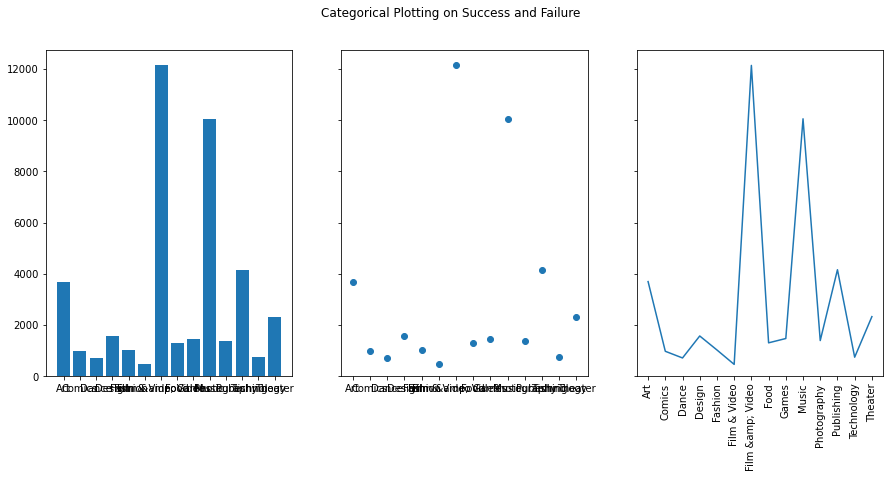

In [27]:
#Plot data successful by categorical
fig, axs = plt.subplots(1,3,figsize = (15,6),sharey=True)
axs[0].bar(index_dic,dic_category)
axs[1].scatter(index_dic,dic_category)
axs[2].plot(index_dic,dic_category)
plt.xticks(range(len(index_dic)),index_dic,rotation='vertical')
fig.suptitle("Categorical Plotting on Success and Failure")
plt.show()

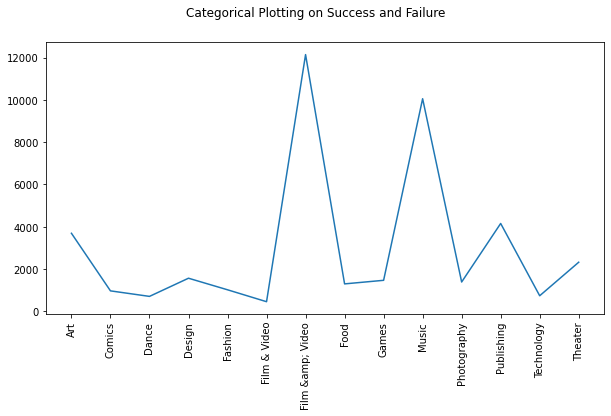

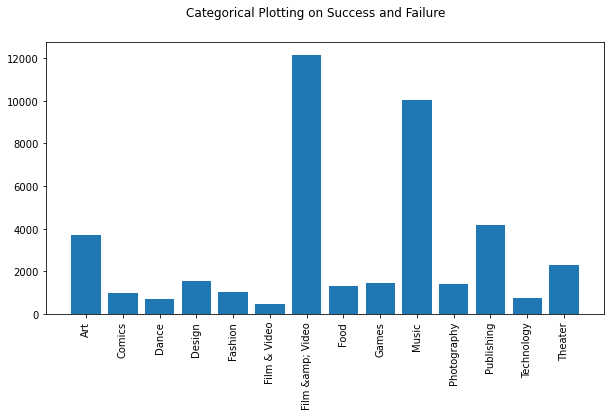

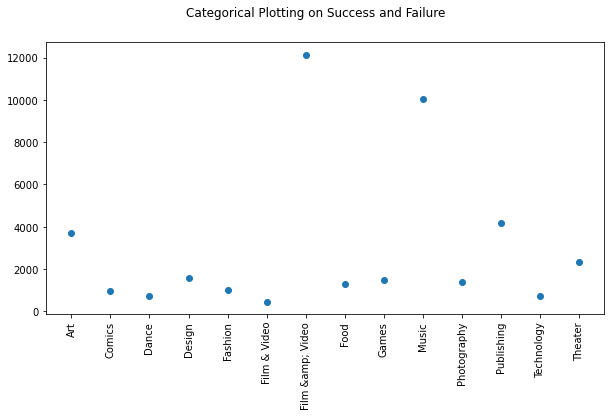

In [28]:
fig,axs = plt.subplots(figsize = (10,5))
axs.plot(index_dic,dic_category)
plt.xticks(range(len(index_dic)),index_dic,rotation='vertical')
fig.suptitle("Categorical Plotting on Success and Failure")
plt.show()

fig,axs = plt.subplots(figsize = (10,5))
axs.bar(index_dic,dic_category)
plt.xticks(range(len(index_dic)),index_dic,rotation='vertical')
fig.suptitle("Categorical Plotting on Success and Failure")
plt.show()

fig,axs = plt.subplots(figsize = (10,5))
axs.scatter(index_dic,dic_category)
plt.xticks(range(len(index_dic)),index_dic,rotation='vertical')
fig.suptitle("Categorical Plotting on Success and Failure")
plt.show()

In [29]:
#transform the category to numberic values(Require methods)

In [30]:
df

,category,status,goal,pledged,funded date,levels,updates,comments,duration,status_num
0,Film & Video,successful,10500.0,11545.0,"Fri, 19 Aug 2011 19:28:17 -0000",7,10,2,30.00,1
1,Games,failed,4000.0,20.0,"Mon, 02 Aug 2010 03:59:00 -0000",5,6,0,47.18,0
3,Film & Video,successful,6000.0,6535.0,"Sun, 08 Apr 2012 02:14:00 -0000",13,4,0,32.22,1
4,Fashion,failed,3500.0,0.0,"Wed, 01 Jun 2011 15:25:39 -0000",6,2,0,30.00,0
5,Film & Video,successful,3500.0,3582.0,"Wed, 22 Jun 2011 13:33:00 -0000",7,8,0,21.43,1
...,...,...,...,...,...,...,...,...,...,...
45952,Dance,successful,500.0,601.0,"Fri, 30 Mar 2012 13:57:00 -0000",3,2,0,37.83,1
45953,Music,failed,10000.0,75.0,"Sun, 22 Apr 2012 02:12:10 -0000",14,1,1,59.96,0
45954,Music,successful,10000.0,10000.0,"Mon, 16 Jan 2012 05:00:00 -0000",4,2,0,27.32,1
45955,Publishing,failed,2999.0,257.0,"Sat, 19 May 2012 19:44:47 -0000",7,17,0,30.00,0


# Plot Continuous data

<AxesSubplot:ylabel='goal'>

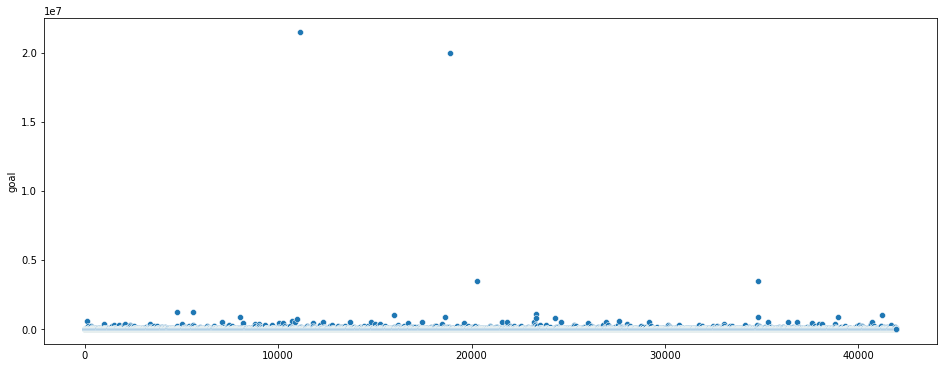

In [31]:
plt.figure(figsize=(16,6))
sns.scatterplot(data = df,x= np.arange(len(df.goal)),y = "goal")

<AxesSubplot:ylabel='pledged'>

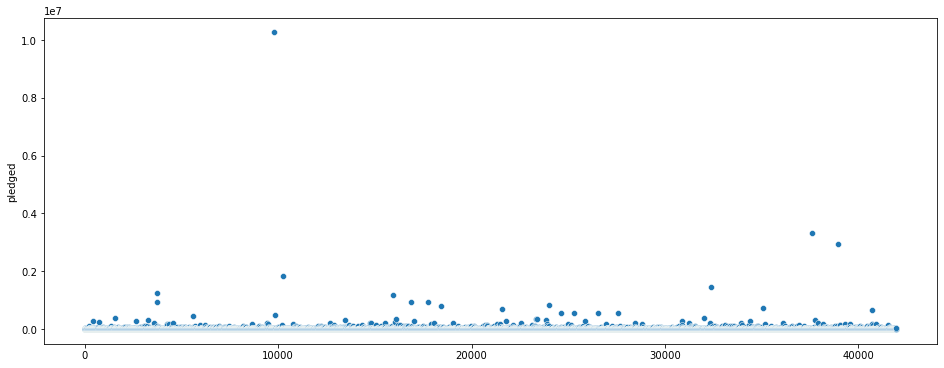

In [32]:
plt.figure(figsize = (16,6))
sns.scatterplot(data = df,x= np.arange(len(df.pledged)),y = "pledged")

<AxesSubplot:ylabel='duration'>

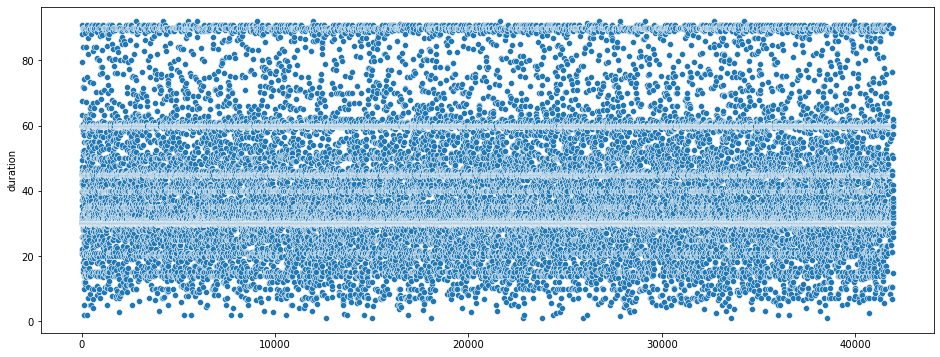

In [33]:
plt.figure(figsize = (16,6))
sns.scatterplot(data = df,x= np.arange(len(df.duration)),y = "duration")

# Plot with status 

<AxesSubplot:xlabel='levels', ylabel='Count'>

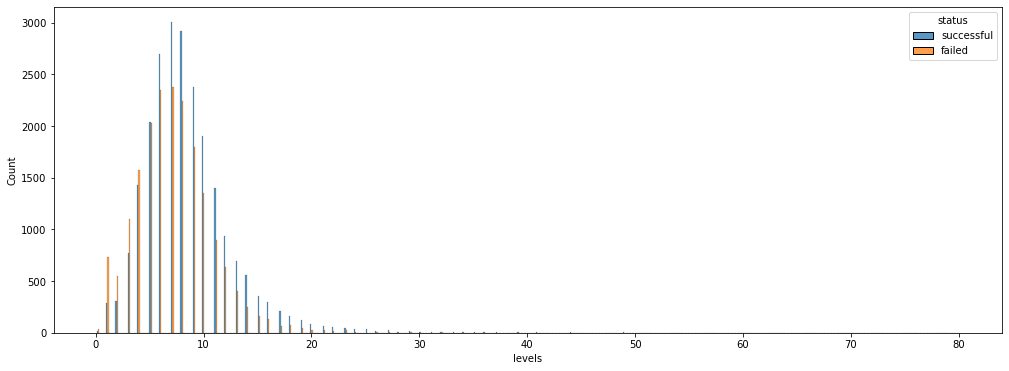

In [34]:
plt.figure(figsize=(17,6))
sns.histplot(data = df,x="levels", hue="status", multiple = "dodge",shrink = 0.8)

<AxesSubplot:xlabel='updates', ylabel='Count'>

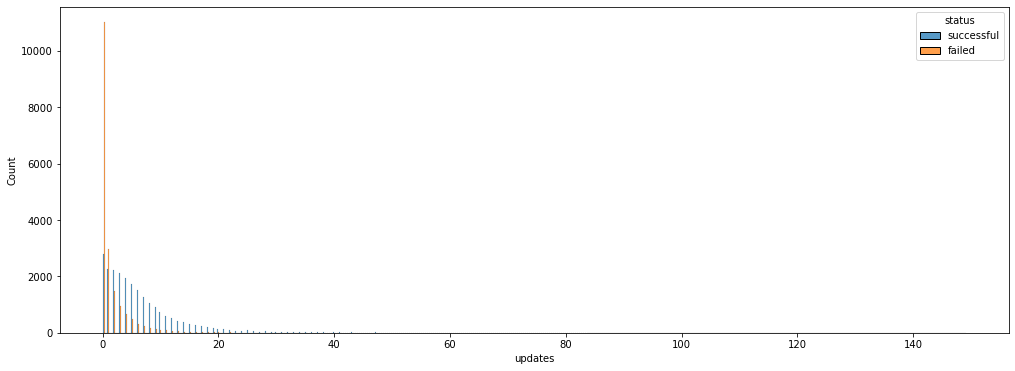

In [35]:
plt.figure(figsize=(17,6))
sns.histplot(data = df,x="updates", hue="status", multiple = "dodge",shrink = 0.8)

<AxesSubplot:xlabel='duration', ylabel='Count'>

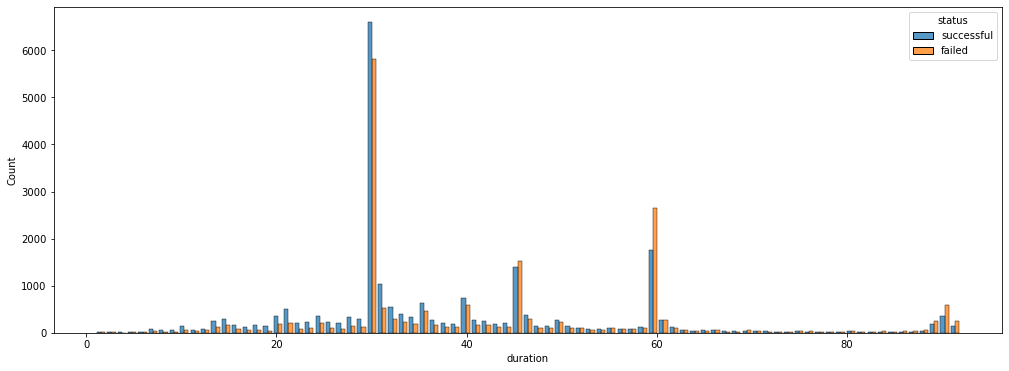

In [36]:
plt.figure(figsize=(17,6))
sns.histplot(data = df,x="duration", hue="status", multiple = "dodge",shrink = 0.8)

In [37]:
df.groupby('comments').size()

comments
0        20932
1         4819
2         3605
3         2358
4         1792
         ...  
10159        1
11284        1
13133        1
13850        1
19311        1
Length: 296, dtype: int64

# Dealing with Outliers

Since we plot charts, we found outliers in goal, pledged, updates, levels. But, we examine more by using the boxplot

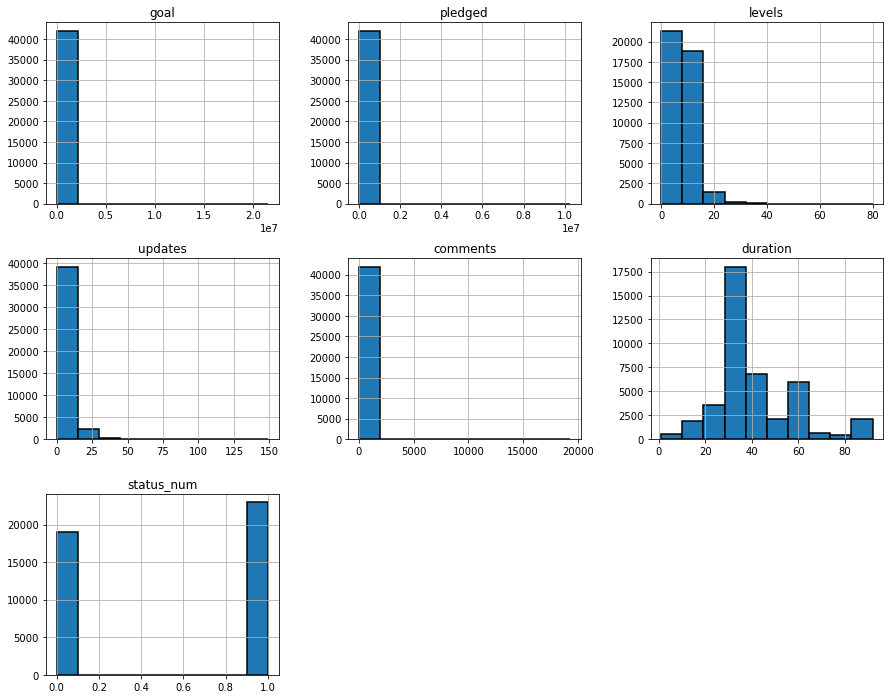

In [38]:
df.hist(edgecolor='black', linewidth=1.5, figsize=(15,12));
plt.show();

In [39]:
data = df[['goal','pledged','levels','updates','comments','duration','status_num']] #Without Category feature
data

,goal,pledged,levels,updates,comments,duration,status_num
0,10500.0,11545.0,7,10,2,30.00,1
1,4000.0,20.0,5,6,0,47.18,0
3,6000.0,6535.0,13,4,0,32.22,1
4,3500.0,0.0,6,2,0,30.00,0
5,3500.0,3582.0,7,8,0,21.43,1
...,...,...,...,...,...,...,...
45952,500.0,601.0,3,2,0,37.83,1
45953,10000.0,75.0,14,1,1,59.96,0
45954,10000.0,10000.0,4,2,0,27.32,1
45955,2999.0,257.0,7,17,0,30.00,0


In [40]:
data.describe()

,goal,pledged,levels,updates,comments,duration,status_num
count,4.196500e+04,4.196500e+04,41965.000000,41965.000000,41965.000000,41965.000000,41965.000000
mean,1.040281e+04,5.123503e+03,7.950578,4.337710,8.310378,40.231645,0.547337
std,1.478198e+05,5.907503e+04,4.190356,6.629182,175.192109,17.780266,0.497760
min,1.000000e-02,0.000000e+00,0.000000,0.000000,0.000000,1.000000,0.000000
25%,1.650000e+03,2.210000e+02,5.000000,0.000000,0.000000,30.000000,0.000000
50%,4.000000e+03,1.450000e+03,7.000000,2.000000,1.000000,32.090000,1.000000
75%,8.800000e+03,4.401000e+03,10.000000,6.000000,3.000000,49.070000,1.000000
max,2.147484e+07,1.026684e+07,80.000000,149.000000,19311.000000,91.960000,1.000000


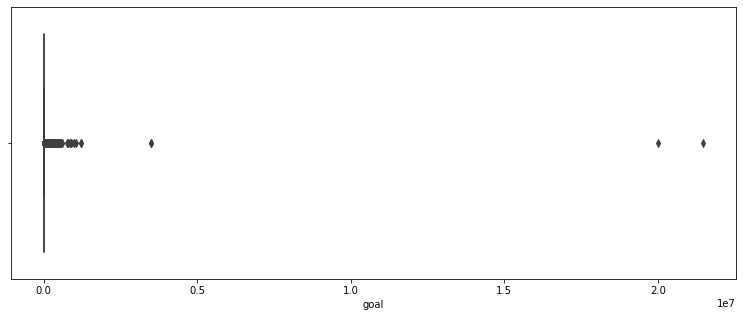

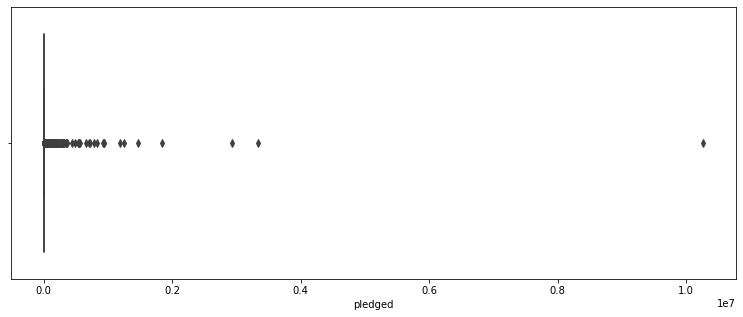

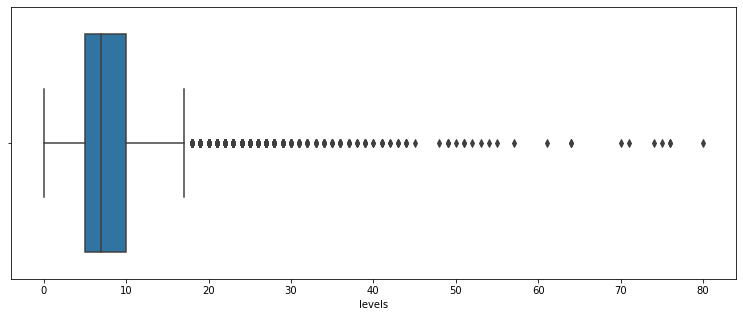

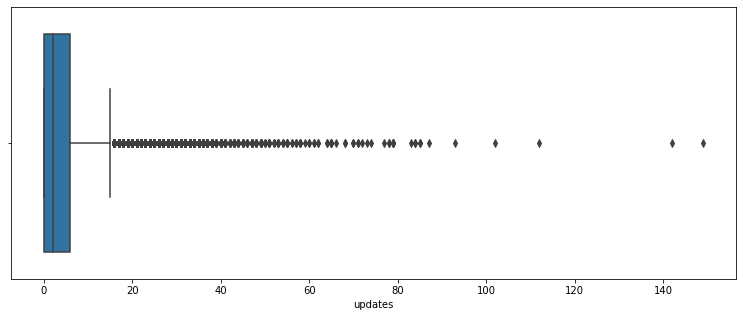

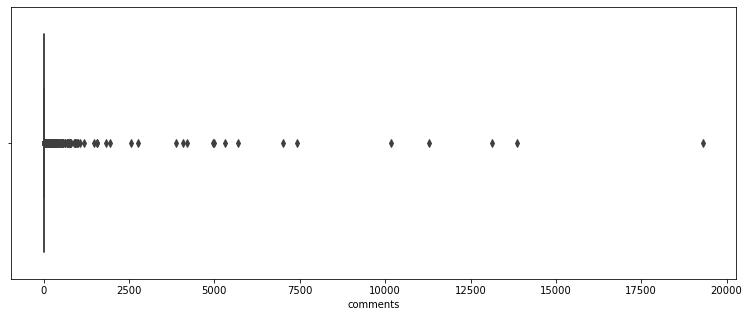

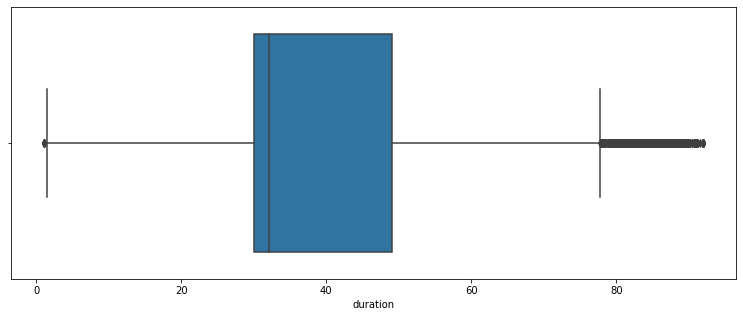

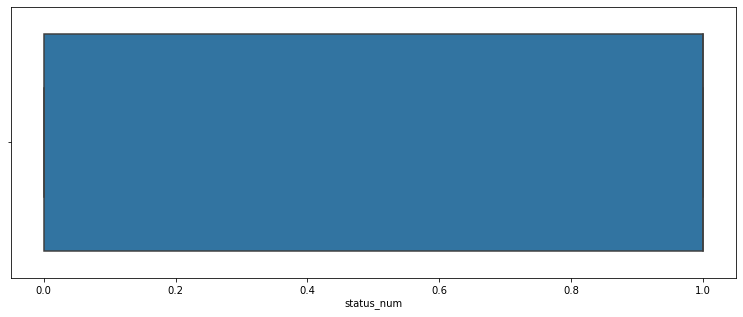

In [41]:
for i in data.columns:
    plt.figure(figsize=(13,5))
    sns.boxplot(x = data['{}'.format(i)])

# Plot Data After delete Outliers

In [42]:
#Use IQR
#Gern Q1, Q3, and IQR for each features
Q1 =[]
Q3=[]
IQR=[]
for val in data.columns:
    Q1.append(data['{}'.format(val)].quantile(0.25))
    Q3.append(data['{}'.format(val)].quantile(0.75))
#Cal IQR
for i in range(len(Q1)):
    IQR.append(Q3[i]-Q1[i])

In [43]:
dict_IQR = dict(zip(data.columns,IQR))
dict_IQR

{'goal': 7150.0,
 'pledged': 4180.0,
 'levels': 5.0,
 'updates': 6.0,
 'comments': 3.0,
 'duration': 19.07,
 'status_num': 1.0}

In [44]:
Q1,Q3

([1650.0, 221.0, 5.0, 0.0, 0.0, 30.0, 0.0],
 [8800.0, 4401.0, 10.0, 6.0, 3.0, 49.07, 1.0])

In [45]:
#Genr Lower and Upper Bound
lower_IQR = []
upper_IQR = []
for i in range(len(dict_IQR)):
    lower_IQR.append(round(Q1[i]-(1.5*IQR[i]),3))
    upper_IQR.append(round(Q3[i]+(1.5*IQR[i]),3))

In [46]:
lower_IQR, upper_IQR

([-9075.0, -6049.0, -2.5, -9.0, -4.5, 1.395, -1.5],
 [19525.0, 10671.0, 17.5, 15.0, 7.5, 77.675, 2.5])

In [47]:
data.goal.max()

21474836.47

In [48]:
data

,goal,pledged,levels,updates,comments,duration,status_num
0,10500.0,11545.0,7,10,2,30.00,1
1,4000.0,20.0,5,6,0,47.18,0
3,6000.0,6535.0,13,4,0,32.22,1
4,3500.0,0.0,6,2,0,30.00,0
5,3500.0,3582.0,7,8,0,21.43,1
...,...,...,...,...,...,...,...
45952,500.0,601.0,3,2,0,37.83,1
45953,10000.0,75.0,14,1,1,59.96,0
45954,10000.0,10000.0,4,2,0,27.32,1
45955,2999.0,257.0,7,17,0,30.00,0


In [49]:
data[(data['goal']<upper_IQR[0])&(data['goal']>lower_IQR[0])] #Show filter

,goal,pledged,levels,updates,comments,duration,status_num
0,10500.0,11545.0,7,10,2,30.00,1
1,4000.0,20.0,5,6,0,47.18,0
3,6000.0,6535.0,13,4,0,32.22,1
4,3500.0,0.0,6,2,0,30.00,0
5,3500.0,3582.0,7,8,0,21.43,1
...,...,...,...,...,...,...,...
45952,500.0,601.0,3,2,0,37.83,1
45953,10000.0,75.0,14,1,1,59.96,0
45954,10000.0,10000.0,4,2,0,27.32,1
45955,2999.0,257.0,7,17,0,30.00,0


In [50]:
#Replace Values with nan
for val in range(len(data.columns)):
    for i in range(len(data['{}'.format(data.columns[val])])):
        if data['{}'.format(data.columns[val])].iloc[i] > upper_IQR[val]:
            data['{}'.format(data.columns[val])].iloc[i] = np.nan
        elif data['{}'.format(data.columns[val])].iloc[i] < lower_IQR[val]:
            data['{}'.format(data.columns[val])].iloc[i] = np.nan
        else:
            pass

/Users/rodtour/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)
<ipython-input-50-334d226e9fe7>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['{}'.format(data.columns[val])].iloc[i] = np.nan
<ipython-input-50-334d226e9fe7>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['{}'.format(data.columns[val])].iloc[i] = n

In [51]:
for i in data.columns:
    print(data['{}'.format(i)].isnull().unique(),i)

[False  True] goal
[ True False] pledged
[False  True] levels
[False  True] updates
[False  True] comments
[False  True] duration
[False] status_num


In [52]:
data #Delete Outliers with np.nan

,goal,pledged,levels,updates,comments,duration,status_num
0,10500.0,NaN,7.0,10.0,2.0,30.00,1
1,4000.0,20.0,5.0,6.0,0.0,47.18,0
3,6000.0,6535.0,13.0,4.0,0.0,32.22,1
4,3500.0,0.0,6.0,2.0,0.0,30.00,0
5,3500.0,3582.0,7.0,8.0,0.0,21.43,1
...,...,...,...,...,...,...,...
45952,500.0,601.0,3.0,2.0,0.0,37.83,1
45953,10000.0,75.0,14.0,1.0,1.0,59.96,0
45954,10000.0,10000.0,4.0,2.0,0.0,27.32,1
45955,2999.0,257.0,7.0,NaN,0.0,30.00,0


In [ ]:
#https://www.machinelearningplus.com/statistics/mahalanobis-distance/ another method for outlier treatment

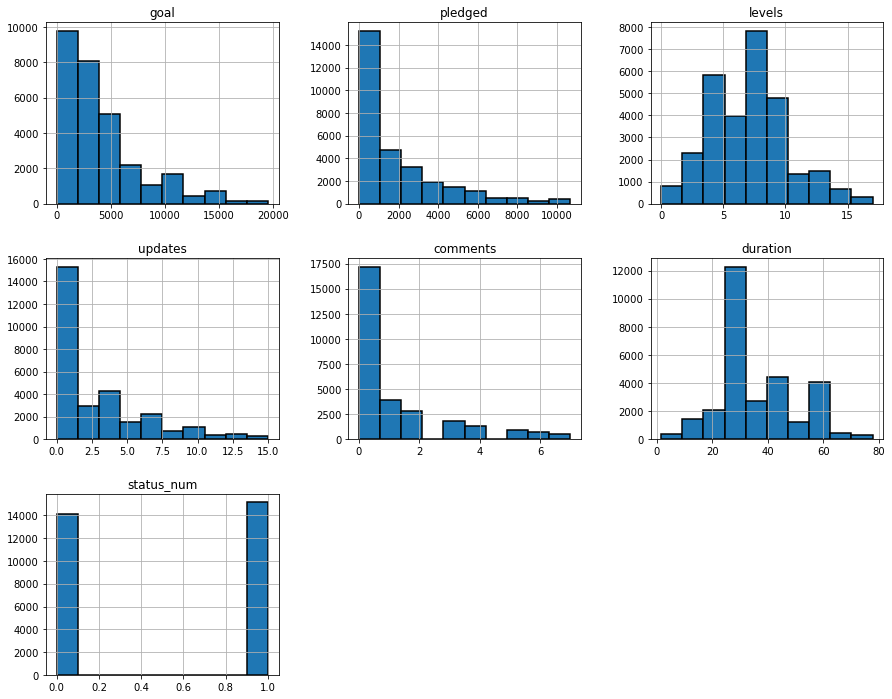

In [55]:
#Plot data after drop outliers , this shows zscore cannot clear outliers
data.dropna().hist(edgecolor='black', linewidth=1.5, figsize=(15,12));
plt.show();

In [56]:
data.describe()

,goal,pledged,levels,updates,comments,duration,status_num
count,37603.000000,38219.000000,40904.000000,39592.000000,36599.000000,39662.000000,41965.000000
mean,4564.151416,2149.142809,7.559652,3.136568,1.209213,37.439042,0.547337
std,4007.785136,2532.171216,3.237944,3.718535,1.826967,13.794839,0.497760
min,0.010000,0.000000,0.000000,0.000000,0.000000,1.490000,0.000000
25%,1500.000000,165.500000,5.000000,0.000000,0.000000,30.000000,0.000000
50%,3000.000000,1125.000000,7.000000,2.000000,0.000000,31.000000,1.000000
75%,6000.000000,3222.000000,10.000000,5.000000,2.000000,45.040000,1.000000
max,19515.000000,10670.000000,17.000000,15.000000,7.000000,77.670000,1.000000


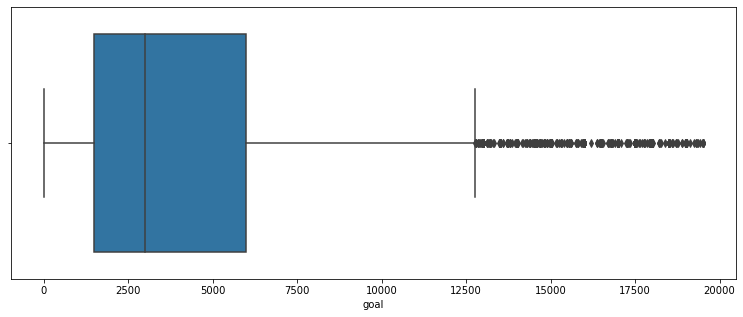

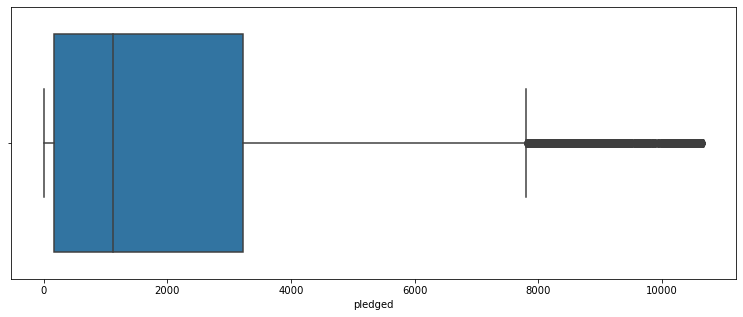

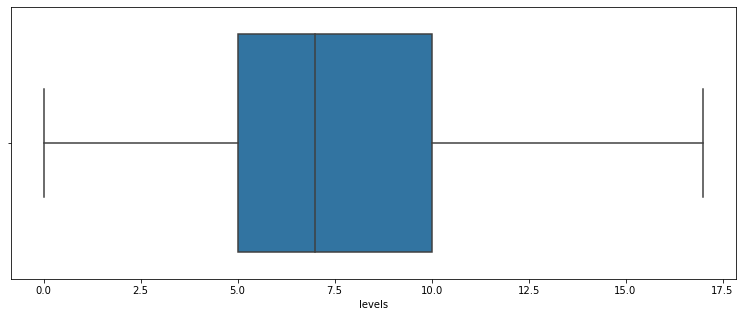

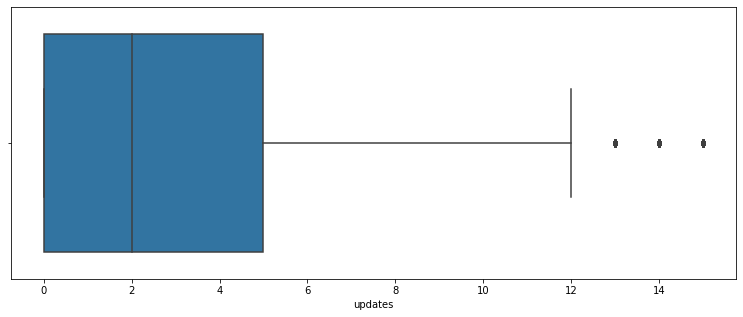

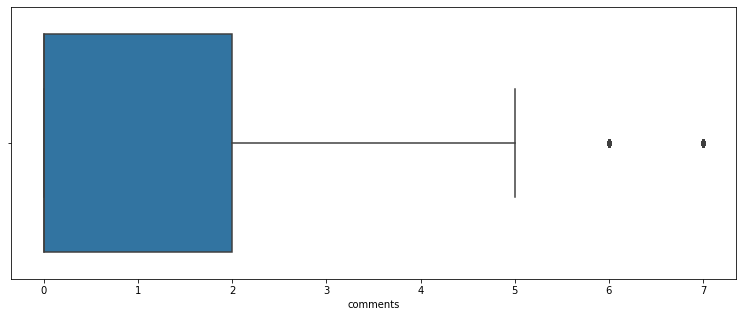

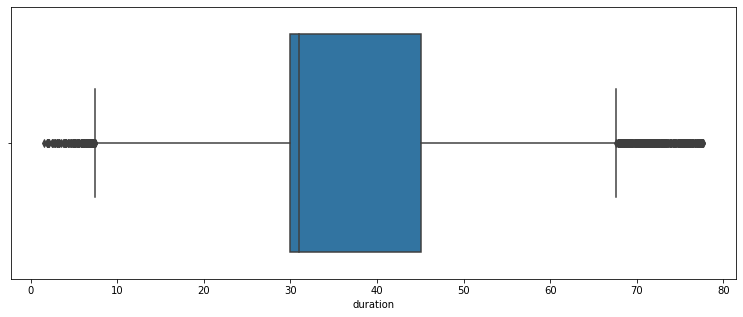

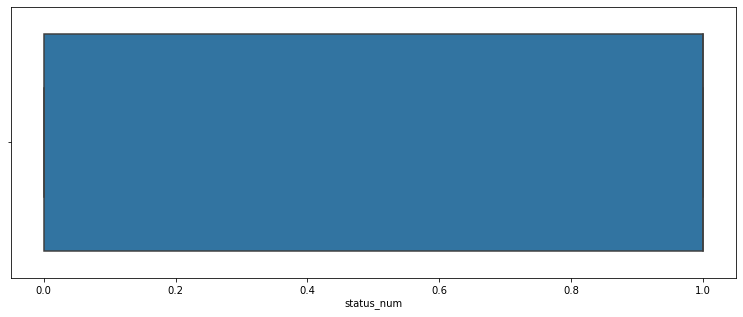

In [57]:
for i in data.columns:
    plt.figure(figsize=(13,5))
    sns.boxplot(x = data['{}'.format(i)])

# Random Forest

In [58]:
#Replace Outlier with Missforest (MissForest) Default
from missingpy import MissForest

/Users/rodtour/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)


In [59]:
#Set param
param = {
    'n_estimators': [5,50,150,250],
    'max_depth' :[4,16,32,None],
    'min_samples_leaf': [3, 4, 5,6],
    'min_samples_split': [8, 10, 12,14]
}
#Model Miss impute
rf_imputer = MissForest(random_state=42)

In [60]:
#Send param into loop function
rf_imputer_index = []
rf_imputer_result = []
for i in param['n_estimators']:
    for j in param['max_depth']:
        for k in param['min_samples_leaf']:
            for p in param['min_samples_split']:
                rf_imputer_index.append((i,j,k,p))
                rf_imputer_result.append(MissForest(random_state=42,n_estimators=i, max_depth = j, min_samples_leaf = k,min_samples_split=p))        

In [61]:
dict_result = dict(zip(rf_imputer_index, rf_imputer_result)) #MAP DICT

In [62]:
len(dict_result)

256

In [63]:
rf_imputer_result[255]

MissForest(min_samples_leaf=6, min_samples_split=14, n_estimators=250,
           random_state=42)

In [64]:
imputed_data_1 = rf_imputer_result[0].fit_transform(data)
imputed_data_256= rf_imputer_result[255].fit_transform(data)

Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4
Iteration: 5
Iteration: 0
Iteration: 1
Iteration: 2
Iteration: 3
Iteration: 4


In [65]:
imputed_data_256, imputed_data_1

(array([[1.05000000e+04, 1.02147024e+04, 7.00000000e+00, ...,
         2.00000000e+00, 3.00000000e+01, 1.00000000e+00],
        [4.00000000e+03, 2.00000000e+01, 5.00000000e+00, ...,
         0.00000000e+00, 4.71800000e+01, 0.00000000e+00],
        [6.00000000e+03, 6.53500000e+03, 1.30000000e+01, ...,
         0.00000000e+00, 3.22200000e+01, 1.00000000e+00],
        ...,
        [1.00000000e+04, 1.00000000e+04, 4.00000000e+00, ...,
         0.00000000e+00, 2.73200000e+01, 1.00000000e+00],
        [2.99900000e+03, 2.57000000e+02, 7.00000000e+00, ...,
         0.00000000e+00, 3.00000000e+01, 0.00000000e+00],
        [1.80000000e+04, 1.03079875e+04, 1.00000000e+01, ...,
         4.00000000e+00, 4.03800000e+01, 1.00000000e+00]]),
 array([[1.05000000e+04, 1.00937093e+04, 7.00000000e+00, ...,
         2.00000000e+00, 3.00000000e+01, 1.00000000e+00],
        [4.00000000e+03, 2.00000000e+01, 5.00000000e+00, ...,
         0.00000000e+00, 4.71800000e+01, 0.00000000e+00],
        [6.00000000e+03, 

In [66]:
#imputed 1
dict_data_Forest_1 =dict(zip(data.columns.values,imputed_data_1.T)) #Transpose Array
df_Forest_1 = pd.DataFrame.from_dict(dict_data_Forest_1)
df_Forest_1

,goal,pledged,levels,updates,comments,duration,status_num
0,10500.0,10093.709329,7.0,10.000000,2.0,30.00,1.0
1,4000.0,20.000000,5.0,6.000000,0.0,47.18,0.0
2,6000.0,6535.000000,13.0,4.000000,0.0,32.22,1.0
3,3500.0,0.000000,6.0,2.000000,0.0,30.00,0.0
4,3500.0,3582.000000,7.0,8.000000,0.0,21.43,1.0
...,...,...,...,...,...,...,...
41960,500.0,601.000000,3.0,2.000000,0.0,37.83,1.0
41961,10000.0,75.000000,14.0,1.000000,1.0,59.96,0.0
41962,10000.0,10000.000000,4.0,2.000000,0.0,27.32,1.0
41963,2999.0,257.000000,7.0,1.210797,0.0,30.00,0.0


In [86]:
#imputed 256
dict_data_Forest_256 =dict(zip(data.columns.values,imputed_data_256.T)) #Transpose Array
df_Forest_256 = pd.DataFrame.from_dict(dict_data_Forest_256)
df_Forest_256

,goal,pledged,levels,updates,comments,duration,status_num
0,10500.0,10214.702438,7.0,10.000000,2.0,30.00,1.0
1,4000.0,20.000000,5.0,6.000000,0.0,47.18,0.0
2,6000.0,6535.000000,13.0,4.000000,0.0,32.22,1.0
3,3500.0,0.000000,6.0,2.000000,0.0,30.00,0.0
4,3500.0,3582.000000,7.0,8.000000,0.0,21.43,1.0
...,...,...,...,...,...,...,...
41960,500.0,601.000000,3.0,2.000000,0.0,37.83,1.0
41961,10000.0,75.000000,14.0,1.000000,1.0,59.96,0.0
41962,10000.0,10000.000000,4.0,2.000000,0.0,27.32,1.0
41963,2999.0,257.000000,7.0,0.420609,0.0,30.00,0.0


In [68]:
df_Forest_1.iloc[99], df_Forest_256.iloc[99] #Right now Idk have not write an accuaracy comparison up!!

(goal          5060.239268
 pledged          0.000000
 levels           8.000000
 updates          0.000000
 comments         0.000000
 duration        30.000000
 status_num       0.000000
 Name: 99, dtype: float64,
 goal          5398.303264
 pledged          0.000000
 levels           8.000000
 updates          0.000000
 comments         0.000000
 duration        30.000000
 status_num       0.000000
 Name: 99, dtype: float64)

In [69]:
#Check whether all data is null?? If True == np.nan, False == No np.nan
for i in df_Forest_1.columns:
    print(df_Forest_1['{}'.format(i)].isnull().unique(),i)

[False] goal
[False] pledged
[False] levels
[False] updates
[False] comments
[False] duration
[False] status_num


In [70]:
#Check whether all data is null?? If True == np.nan, False == No np.nan
for i in df_Forest_256.columns:
    print(df_Forest_256['{}'.format(i)].isnull().unique(),i)

[False] goal
[False] pledged
[False] levels
[False] updates
[False] comments
[False] duration
[False] status_num


# Plot for df_1

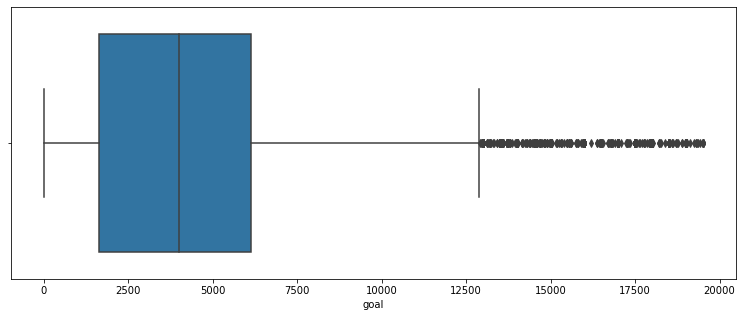

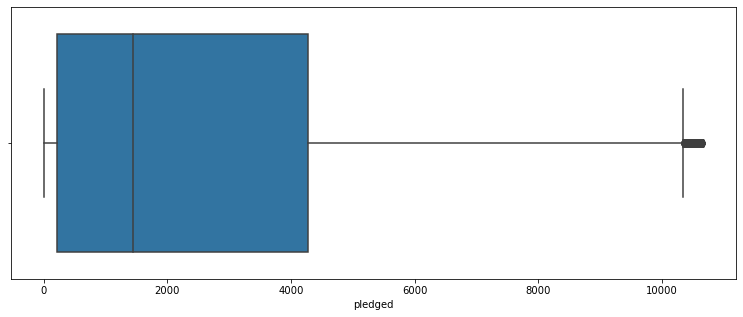

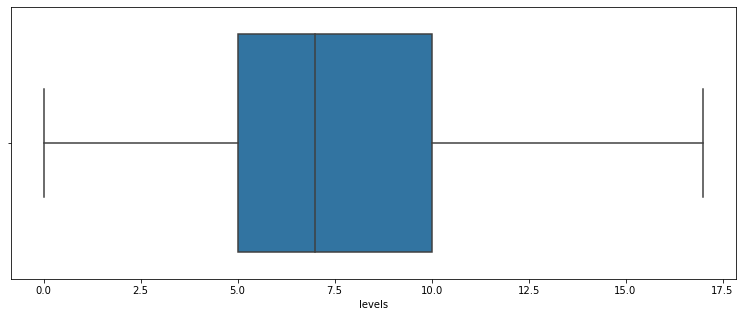

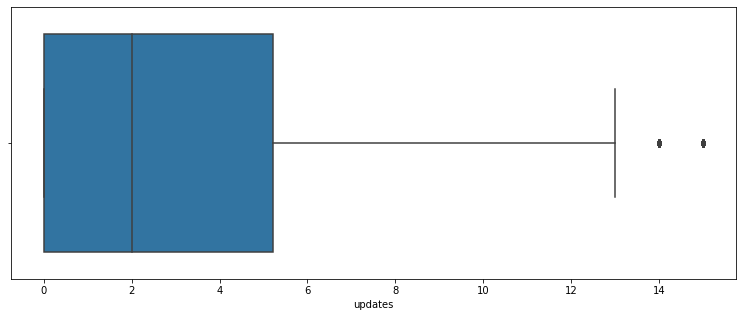

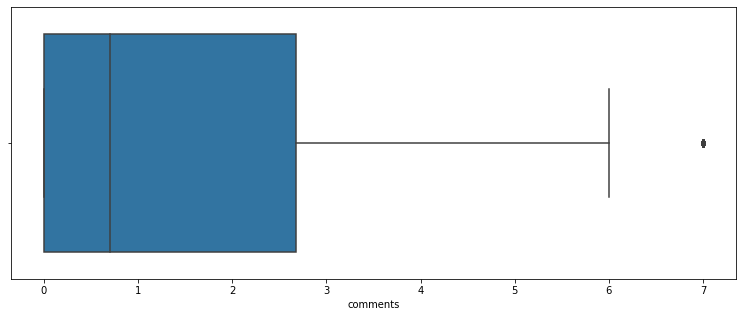

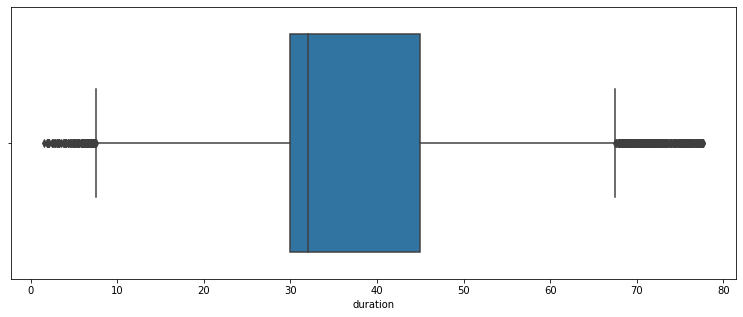

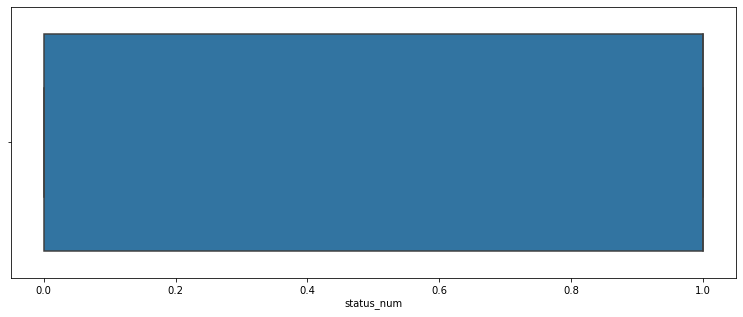

In [71]:
for i in df_Forest_1.columns:
    plt.figure(figsize=(13,5))
    sns.boxplot(x = df_Forest_1['{}'.format(i)])

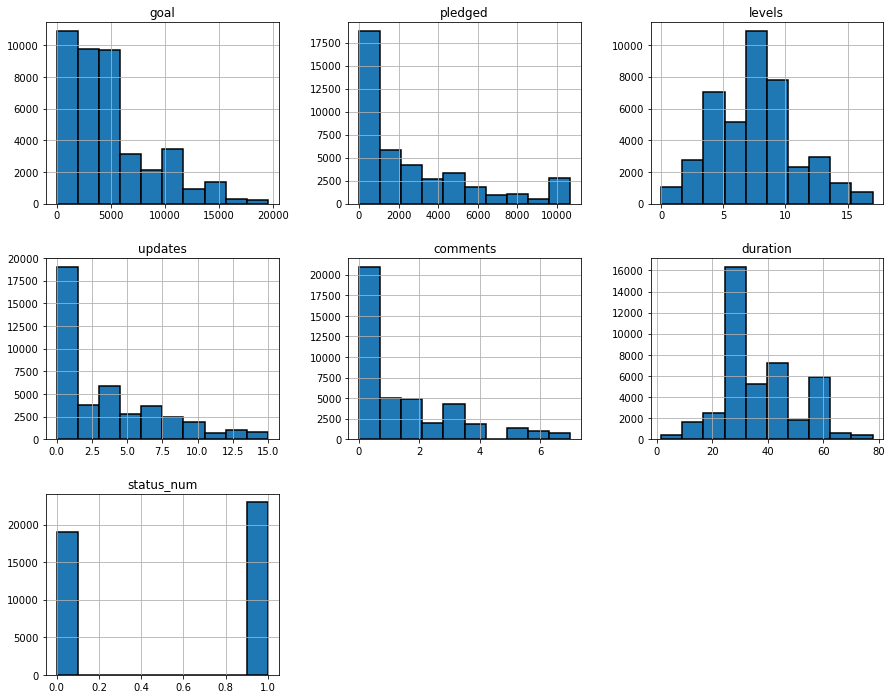

In [72]:
#data_house2.hist(edgecolor='pink', linewidth=1.2, figsize=(12,));
df_Forest_1.hist(edgecolor='black', linewidth=1.5, figsize=(15,12));
plt.show();

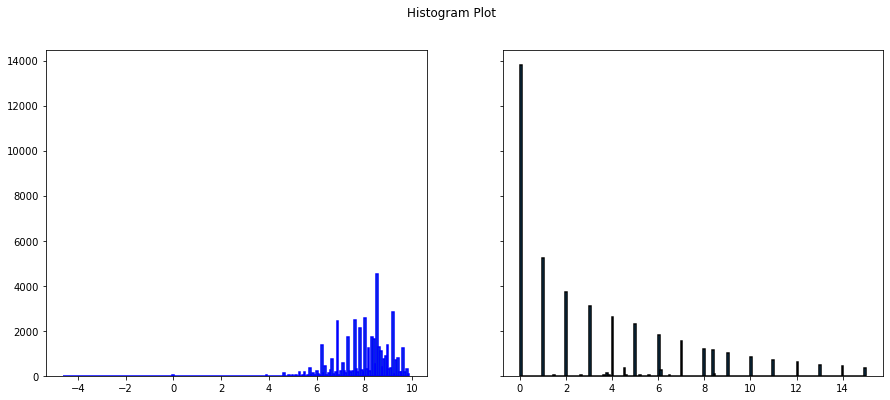

In [73]:
fig, axs = plt.subplots(1,2,figsize=(15,6),sharey=True)
axs[0].hist(np.log(df_Forest_1.goal),edgecolor='blue', linewidth=1.5,bins = 200)
axs[1].hist(df_Forest_1.updates,edgecolor='black', linewidth=1.5,bins = 200)
fig.suptitle("Histogram Plot")
plt.show()

# Plot df_256

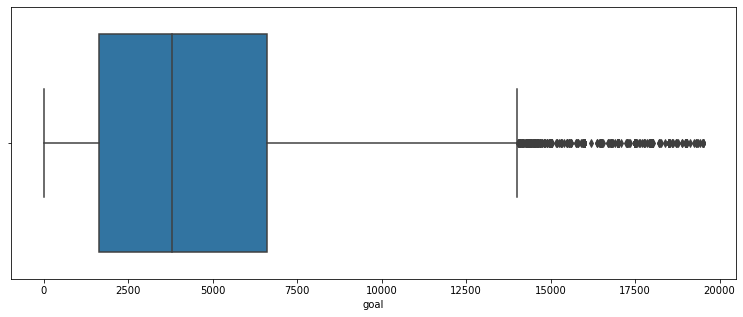

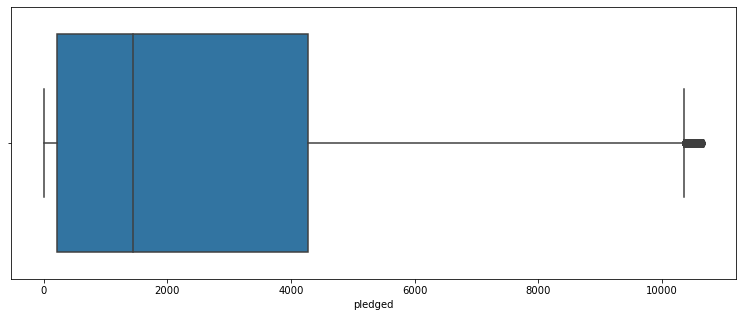

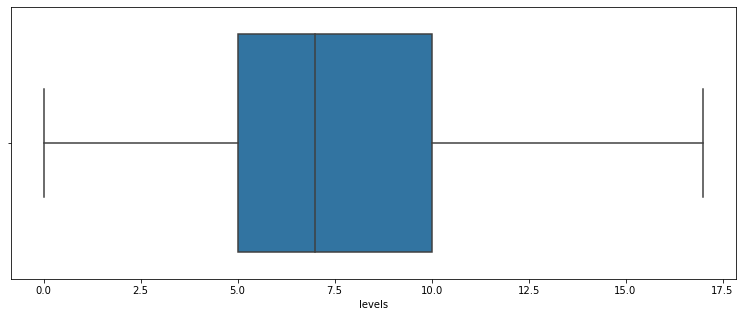

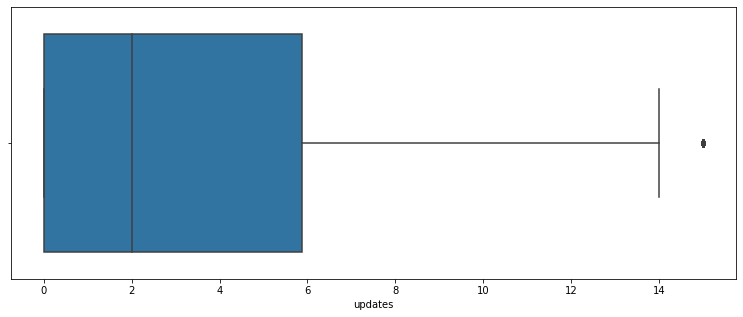

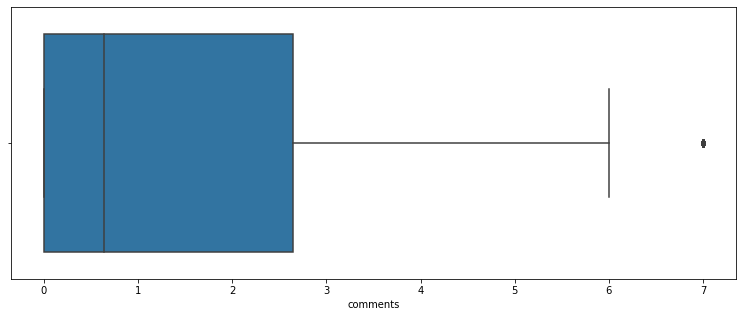

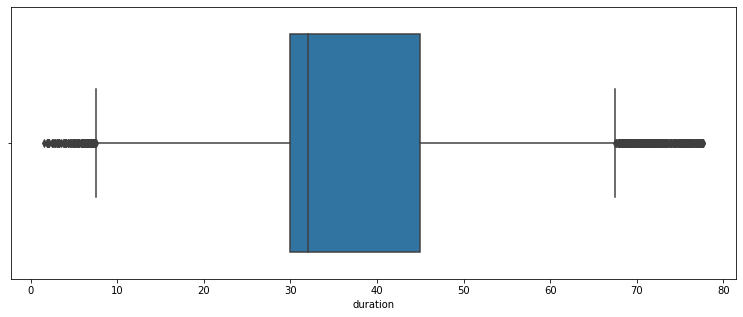

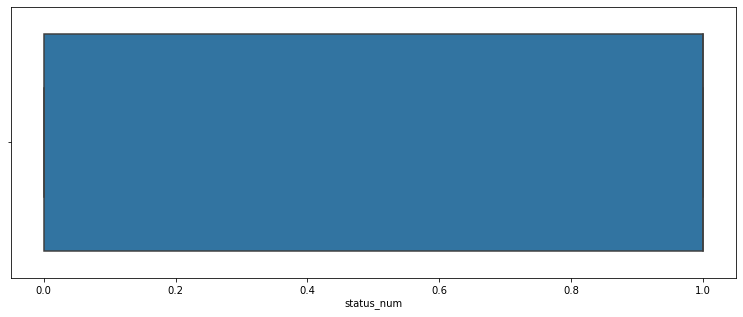

In [74]:
for i in df_Forest_256.columns:
    plt.figure(figsize=(13,5))
    sns.boxplot(x = df_Forest_256['{}'.format(i)])

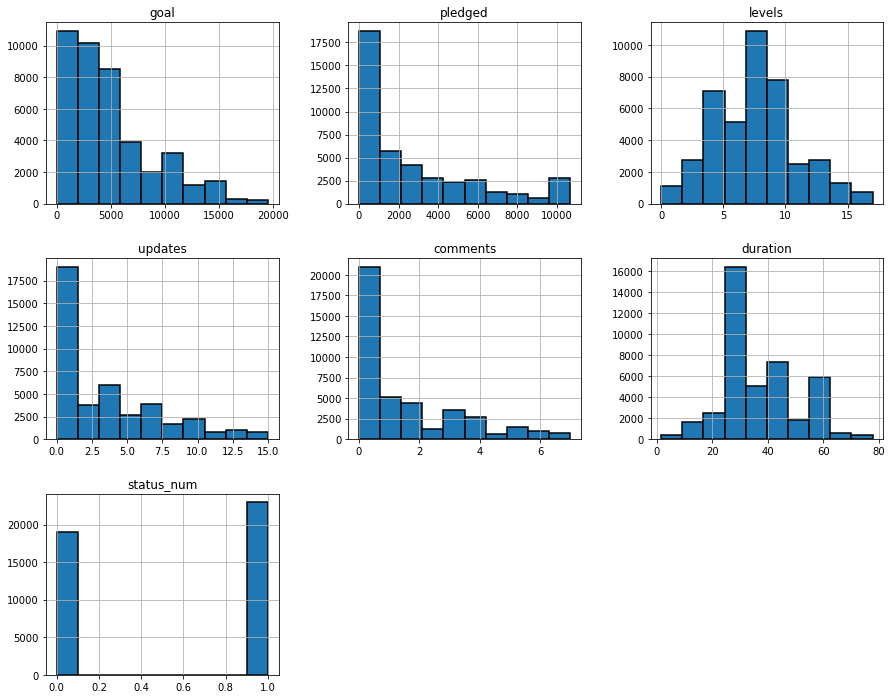

In [75]:
#data_house2.hist(edgecolor='pink', linewidth=1.2, figsize=(12,));
df_Forest_256.hist(edgecolor='black', linewidth=1.5, figsize=(15,12));
plt.show();

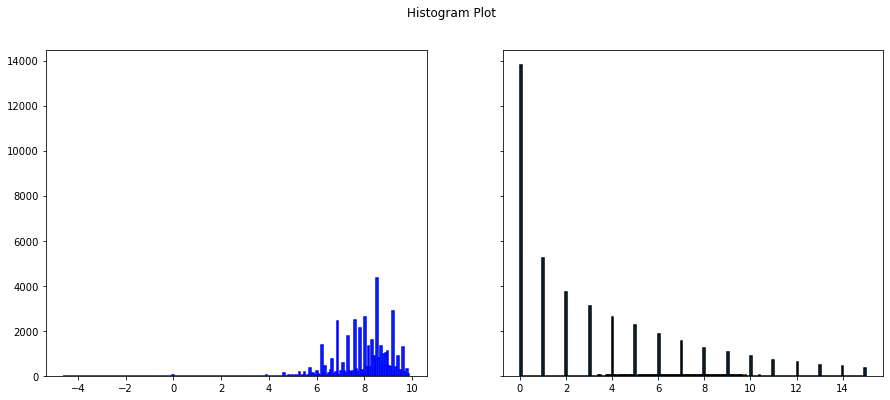

In [76]:
fig, axs = plt.subplots(1,2,figsize=(15,6),sharey=True)
axs[0].hist(np.log(df_Forest_256.goal),edgecolor='blue', linewidth=1.5,bins = 200)
axs[1].hist(df_Forest_256.updates,edgecolor='black', linewidth=1.5,bins = 200)
fig.suptitle("Histogram Plot")
plt.show()

In [77]:
df_Forest_1.describe()

,goal,pledged,levels,updates,comments,duration,status_num
count,41965.000000,41965.000000,41965.000000,41965.000000,41965.000000,41965.000000,41965.000000
mean,4738.938584,2644.637408,7.603367,3.331548,1.386623,37.513712,0.547337
std,3909.127094,3000.312831,3.225089,3.730716,1.784714,13.447599,0.497760
min,0.010000,0.000000,0.000000,0.000000,0.000000,1.490000,0.000000
25%,1650.000000,220.000000,5.000000,0.000000,0.000000,30.000000,0.000000
50%,4000.000000,1441.000000,7.000000,2.000000,0.709151,32.000000,1.000000
75%,6148.819260,4271.000000,10.000000,5.226412,2.675615,45.000000,1.000000
max,19515.000000,10670.000000,17.000000,15.000000,7.000000,77.670000,1.000000


In [78]:
df_Forest_256.describe()

,goal,pledged,levels,updates,comments,duration,status_num
count,41965.000000,41965.000000,41965.000000,41965.000000,41965.000000,41965.000000,41965.000000
mean,4776.696201,2683.417529,7.598354,3.344547,1.436585,37.518828,0.547337
std,3952.044268,3049.833293,3.217885,3.750965,1.847615,13.463215,0.497760
min,0.010000,0.000000,0.000000,0.000000,0.000000,1.490000,0.000000
25%,1650.000000,220.000000,5.000000,0.000000,0.000000,30.000000,0.000000
50%,3800.000000,1442.000000,7.000000,2.000000,0.641958,32.000000,1.000000
75%,6605.217822,4276.000000,10.000000,5.867180,2.650063,45.000000,1.000000
max,19515.000000,10670.000000,17.000000,15.000000,7.000000,77.670000,1.000000


# Modelling

In [79]:
#Seperate Dataset ==> train/test/ Label/Feature
from sklearn.model_selection import train_test_split

In [85]:
#Get Features
label = df_Forest_256.status_num #recall from start

AttributeError: 'DataFrame' object has no attribute 'status_num'

In [89]:
df_Forest_256.drop('status_num',axis=1,inplace=True)

In [91]:
feature = df_Forest_256

In [92]:
feature, label

(          goal       pledged  levels    updates  comments  duration
 0      10500.0  10214.702438     7.0  10.000000       2.0     30.00
 1       4000.0     20.000000     5.0   6.000000       0.0     47.18
 2       6000.0   6535.000000    13.0   4.000000       0.0     32.22
 3       3500.0      0.000000     6.0   2.000000       0.0     30.00
 4       3500.0   3582.000000     7.0   8.000000       0.0     21.43
 ...        ...           ...     ...        ...       ...       ...
 41960    500.0    601.000000     3.0   2.000000       0.0     37.83
 41961  10000.0     75.000000    14.0   1.000000       1.0     59.96
 41962  10000.0  10000.000000     4.0   2.000000       0.0     27.32
 41963   2999.0    257.000000     7.0   0.420609       0.0     30.00
 41964  18000.0  10307.987505    10.0   6.234871       4.0     40.38
 
 [41965 rows x 6 columns],
 0        1.0
 1        0.0
 2        1.0
 3        0.0
 4        1.0
         ... 
 41960    1.0
 41961    0.0
 41962    1.0
 41963    0.0
 41

In [93]:
X_train, X_test, y_train, y_test = train_test_split(feature, label, test_size=0.2, random_state=42)

In [94]:
X_train, X_test, y_train, y_test 

(               goal  pledged  levels  updates  comments   duration
 10383   1500.000000      0.0     7.0      1.0       0.0  30.000000
 21847   2000.000000   3266.0     6.0      7.0       2.0  45.000000
 40082   2000.000000      0.0     5.0      0.0       0.0  30.000000
 16177   3297.216133      0.0     5.0      0.0       0.0  31.920000
 37576    500.000000    125.0     4.0      0.0       0.0  29.960000
 ...             ...      ...     ...      ...       ...        ...
 6265    2700.000000     35.0     8.0      0.0       1.0  34.045578
 11284  19000.000000    220.0     5.0      1.0       3.0  71.110000
 38158   1200.000000   1275.0     7.0      1.0       1.0  25.580000
 860     5000.000000   6060.0    17.0      4.0       3.0  29.280000
 15795   3000.000000   3144.0     8.0      0.0       0.0  36.080000
 
 [33572 rows x 6 columns],
            goal       pledged  levels    updates  comments   duration
 4580     240.00    240.000000     4.0   0.000000  0.000000  24.000000
 13610   5000

In [97]:
#Export Data to csv
#df_val.drop(['category','location','funded date'],axis=1,inplace=True)
df_val.to_csv('df_val.csv',index=False)
X_train.to_csv('X_train.csv',index=False)
X_test.to_csv('X_test.csv',index=False)
y_train.to_csv('y_train.csv',index=False)
y_test.to_csv('y_test.csv',index=False)

# Detect Outliers by z score